# Spam email classification in Tensorflow
> Here we will walk through the spam emails classification using Tensorflow. Tensorflow provides wide variety of controls in processing texts.  

In [24]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define the hyperparameters

In [25]:
vocab_size = 1000
embedding_dim = 64
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [26]:
spam = pd.read_csv('spam.csv',  encoding='latin-1')
spam = spam.filter(['v1','v2'], axis=1)
spam.columns = ['label', 'text']
spam

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# First distinguish between the labels and the text

In [27]:
sentences = []
labels = []
for i in range(0,spam.shape[0],1):
    sentences.append(spam['text'][i])
    labels.append(spam['label'][i])

# Allocate 80% of the data for training

In [28]:
training_size = int(spam.shape[0]*0.8)
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels_str = labels[0:training_size]
testing_labels_str = labels[training_size:]

# Encoding the string labels to 0 and 1 (1 for real email and 0 for spam)

In [29]:
training_labels = [0] * len(training_labels_str)
for ind,item in enumerate(training_labels_str):
    if item == 'ham':
        training_labels[ind] = 1
    else:
        training_labels[ind] = 0
        
testing_labels = [0] * len(testing_labels_str)
for ind,item in enumerate(testing_labels_str):
    if item == 'ham':
        testing_labels[ind] = 1
    else:
        testing_labels[ind] = 0

# Converting texts and labels to numpy array to feed into the model

In [30]:
training_padded = np.array(training_padded)
testing_padded = np.array(testing_padded)

training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

# Start tokenizing the text of the data

In [31]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

# Pad the data to make all data have equal length

In [32]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


# Define the RNN model with bidirectional LSTM algorithm.

In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [34]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 64)           64000     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                24832     
_________________________________________________________________
dense_4 (Dense)              (None, 24)                1560      
_________________________________________________________________
dropout_2 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 90,417
Trainable params: 90,417
Non-trainable params: 0
_________________________________________________________________


In [35]:
num_epochs = 20
history = model.fit(training_padded, training_labels, epochs=num_epochs, \
                    validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/20
140/140 [==============================] - 10s 46ms/step - loss: 0.5698 - accuracy: 0.8275 - val_loss: 0.3547 - val_accuracy: 0.8700
Epoch 2/20
140/140 [==============================] - 6s 41ms/step - loss: 0.3358 - accuracy: 0.8652 - val_loss: 0.2574 - val_accuracy: 0.8700
Epoch 3/20
140/140 [==============================] - 6s 41ms/step - loss: 0.2310 - accuracy: 0.8912 - val_loss: 0.1612 - val_accuracy: 0.9641
Epoch 4/20
140/140 [==============================] - 7s 49ms/step - loss: 0.1463 - accuracy: 0.9654 - val_loss: 0.1035 - val_accuracy: 0.9722
Epoch 5/20
140/140 [==============================] - 6s 46ms/step - loss: 0.1003 - accuracy: 0.9749 - val_loss: 0.0720 - val_accuracy: 0.9785
Epoch 6/20
140/140 [==============================] - 7s 49ms/step - loss: 0.0720 - accuracy: 0.9841 - val_loss: 0.0579 - val_accuracy: 0.9803
Epoch 7/20
140/140 [==============================] - 7s 48ms/step - loss: 0.0598 - accuracy: 0.9865 - val_loss: 0.0525 - val_accuracy: 0.983

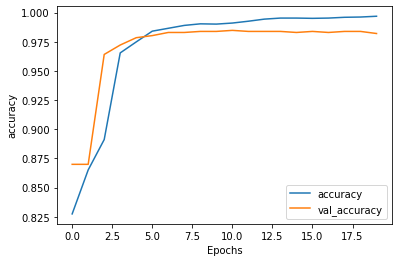

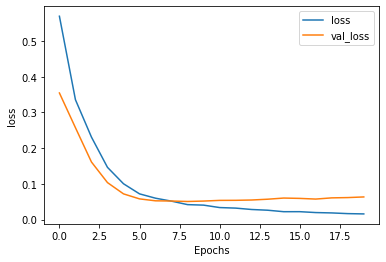

In [36]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [37]:
X_train = training_padded
X_test = testing_padded

y_train = training_labels
y_test = testing_labels

In [38]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = model.predict(X_test)

# Convert predicted values to either 0 or 1
y_prediction = [0] * y_pred.shape[0]
for ind,item in enumerate(y_pred):
    if item > 0.5:
        y_prediction[ind] = 1
    else:
        y_prediction[ind] = 0

rep = classification_report(y_test, y_prediction)

In [39]:
print(rep)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       145
           1       0.99      0.99      0.99       970

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



# Check a random text

In [40]:
sample_text = ["Winner!!! Darling please click the link to claim your free prize"]

sample_text_tokenized  = tokenizer.texts_to_sequences(sample_text)
sample_text_tokenized_padded = pad_sequences(sample_text_tokenized, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# 0 for spam and 1 for real
pred = float(model.predict(sample_text_tokenized_padded))
if (pred>0.5):
    print ("This is a real email")
else:
    print("This is a spam")

This is a spam
